# Resumen de la frontera de decisión para algunos modelos de clasificación

En este _notebook_ vamos a repasar algunos de los modelos más importantes en el área de ML y vamos a ver su frontera de decisión. Para esto, usaremos el _dataset_ Iris. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# import some data to play with
iris = datasets.load_iris()

# Tomamos el largo y ancho del pétalo, respectivamente
X = iris.data[:, [2, 3]]
# Los target son setosa, versicolor y virginica
y = iris.target

En este caso vamos a querer predecir **el tipo de flor** en base a dos _features_: el largo y el ancho del pétalo. Primero vamos a graficar todas las flores según su tipo. En el eje $x$ vamos a tener el largo del pétalo y en el eje $y$ vamos a tener el ancho. La idea es ver cómo cada clasificador divide el espacio según los distintos tipos de flor.

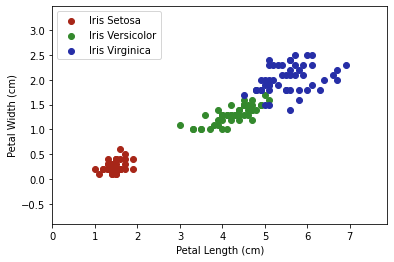

In [2]:
# Colores
cmap_bold = ['#a72618', '#34892d', '#262ea7']

# Límites del gráfico
# Buscamos los límites del gráfico
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()
plt.show()

### Predicción con regresión logística

Ahora vamos a hacer una predicción con regresión logística para saber si una flor **es o no Virginica**. Es decir, vamos a hacer clasificación binaria.

In [3]:
from sklearn.linear_model import LogisticRegression

y_virginica = (iris['target'] == 2).astype(np.int) # Dejamos True en las filas que son Virginica
log_reg = LogisticRegression()

# Entrenamos nuestro modelo
log_reg.fit(X, y_virginica)

LogisticRegression()

Una vez entrenado el modelo, vamos a ver que el regresor logístico es un **clasificador lineal**. Esto es, asociado al clasificador hay una recta que va a dividir el espacio (es decir, la frontera de decisión está determinada por esta recta). Así, cuando uno pregunte por una instancia, basicamente vamos a ver de que lado de la recta (i.e. de la frontera) está.

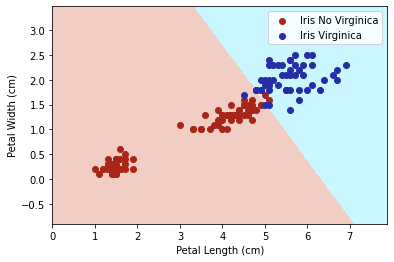

In [4]:
# Coloroes para la frontera de decisión
cmap_light = ListedColormap(['#f2cdc3', '#c9f6ff'])

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y_virginica==0, 0], X[y_virginica==0, 1], c=cmap_bold[0], label='Iris No Virginica')
plt.scatter(X[y_virginica==1, 0], X[y_virginica==1, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

### Predicción con KNN

Ahora vamos a hacer una predicción con KNN para saber **el tipo de cada flor**. Es decir, vamos a hacer clasificación multiclase, donde las clases son los tres tipos de flores. Este clasificador se basa en distancias a los ejemplos conocidos y **genera una clasificación** no lineal. Esto lo podemos ver graficando su frontera de decisión.

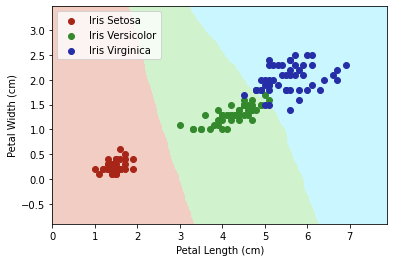

In [5]:
from sklearn import neighbors

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])

# Entrenamos
K = 15
knn_clf = neighbors.KNeighborsClassifier(K, weights='uniform') 
knn_clf.fit(X, y)

Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

### Predicción con árboles de decisión

Ahora vamos a utilizar árboles de decisión para hacer clasificación multiclase, y ver la frontera de decisión que genera.

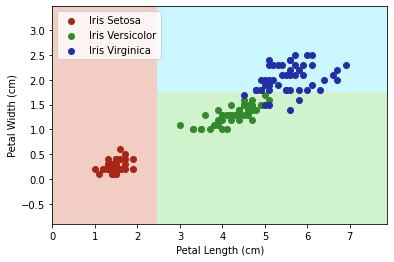

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])

# Entrenamos
# random_state es para que los resultados sean replicables
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Para entender la frontera de decisión, vamos a ver el árbol generado a partir de estos datos, dada la profundidad máxima que indicamos.

In [7]:
from sklearn.tree import export_graphviz

# Ojo, esto genera un .dot, tienes que transformarlo a un .png
export_graphviz(
    tree_clf,
    out_file='/Users/adriansotosuarez/Desktop/tree.dot', # Se exporta en esta ubicación
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

El archivo es un `.dot` que debemos transformar en `.png`. El resultado es el siguiente:

![Tree 1](img/tree.png)

Como vemos, la frontera de decisión calza con el árbol generado (y esto explica la forma de la frontera). Ahora, si incrementamos la profundidad del árbol, trendremos una versión mucho más ajustada.

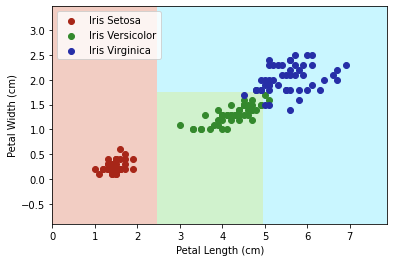

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])

# Entrenamos
# random_state es para que los resultados sean replicables
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Y el árbol asociado:

In [9]:
# Ojo, esto genera un .dot, tienes que transformarlo a un .png
export_graphviz(
    tree_clf,
    out_file='/Users/adriansotosuarez/Desktop/tree.dot', # Se exporta en esta ubicación
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

![Tree 1](img/tree2.png)

### Predicción con SVM

Finalmente, vamos a predecir utilizando SVM. En primera instancia, no vamos a utilizar ningún _kernel_, por lo que la frontera de decisión será lineal.

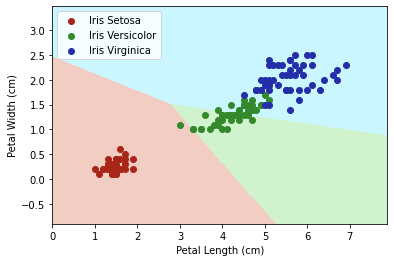

In [32]:
from sklearn.svm import LinearSVC

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])

# Entrenamos
# random_state es para que los resultados sean replicables
svm_clf = LinearSVC(C=2, loss='hinge', max_iter=6000)
svm_clf.fit(X, y)

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Ojo que originalmente SVM es un clasificador para clasificación binaria, sin embargo, podemos utilizarlo para hacer clasificación multiclase utilizando las técnicas OVO u OVR. Ahora, para hacer clasificación no lineal, podemos utilizar un kernel, en este caso el _kernel_ **rbf**. 

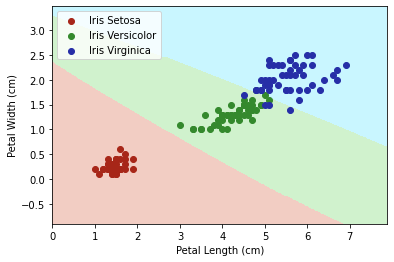

In [37]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])

# SVM escalado con media en 0, porque se desempeña mejor en la práctica
# Ojo, tenemos que señalarle que queremos que use One vs One (ovo) en vez the ovr
kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=0.1, C=0.001, decision_function_shape='ovo'))
    ])
kernel_svm_clf.fit(X, y)
Z = kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()

Notamos que la frontera de decisión es muy sensible al cambio de los parámetros del _kernel_. Veamos un ejemplo.

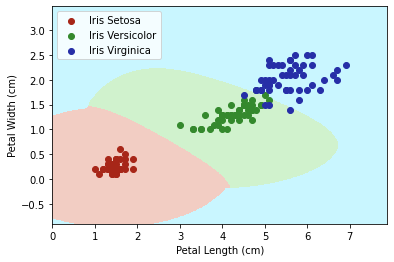

In [10]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Colores
cmap_light = ListedColormap(['#f2cdc3', '#d0f2cd', '#c9f6ff'])

# SVM escalado con media en 0, porque se desempeña mejor en la práctica
# Ojo, tenemos que señalarle que queremos que use One vs One (ovo) en vez the ovr
kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf', gamma=1, C=0.001, decision_function_shape='ovo'))
    ])
kernel_svm_clf.fit(X, y)
Z = kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Resultado de la frontera de decisión con color claro
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.scatter(X[y==0, 0], X[y==0, 1], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], c=cmap_bold[2], label='Iris Virginica')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.legend()

plt.show()